In [1]:
import numpy as np
import pandas as pd
from minisom import MiniSom
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
%matplotlib inline

import sys, os
sys.path.append('..')
from utils import data_preprocesados, etiquetas, LP_datos, plot_LP_list

 instala AntroPy [https://raphaelvallat.com/antropy] pip3 install antropy


In [2]:
X_all = data_preprocesados(2, n_components=2)

[0.35839694 0.2125936 ] 0.5709905462563241


In [3]:
# data normalization
data = X_all / np.std(X_all)

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 2000, verbose=True)

 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.774906738705434


In [4]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

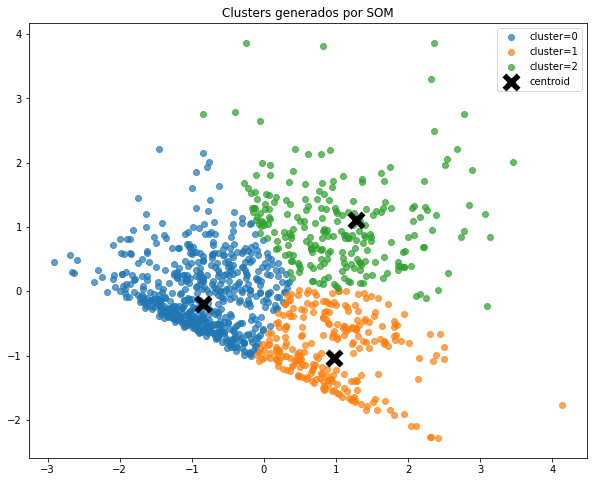

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_title('Clusters generados por SOM')

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=15, linewidths=20, color='k', label='centroid')
plt.legend()

In [6]:
X_all = data_preprocesados(2, n_components=5)

[0.35839694 0.2125936  0.08712974 0.06979471 0.06568434] 0.7935993420974988


In [7]:
# data normalization
data = X_all / np.std(X_all)

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 2000, verbose=True)

 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 1.6064265017234174


In [8]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

In [9]:
tsne = TSNE(init='pca', learning_rate='auto')
data_2D = tsne.fit_transform(data)

# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data_2D.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data_2D, 2000, verbose=True)

C:\Users\Pablo\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 14.827881189656997


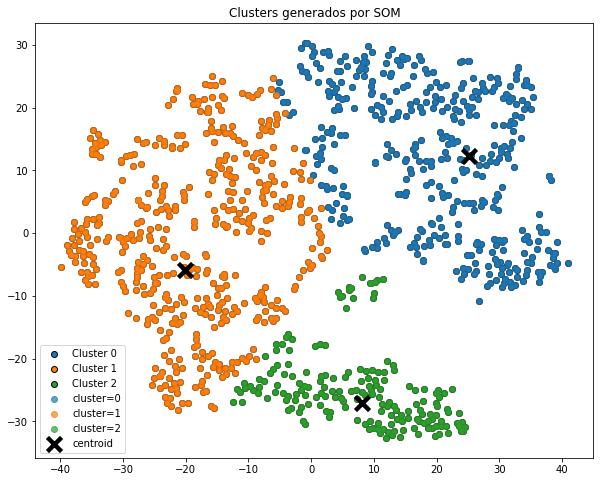

In [10]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data_2D]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

#y_predict = som.fit_predict(data_2D)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.set_title('Clusters generados por SOM')


for i in np.unique(cluster_index):
    ax.scatter(
        x = data_2D[cluster_index == i, 0],
        y = data_2D[cluster_index == i, 1], 
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Cluster {i}"
    )

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data_2D[cluster_index == c, 0],
                data_2D[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=20, color='k', label='centroid')
plt.legend()